In [ ]:
# importing all the required libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import skimage.io as io
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise
from skimage.filters import gaussian
import matplotlib.pyplot as plt
% matplotlib inline
import skimage
from skimage import data
from skimage import transform
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
# reading the image using its path
image = mpimg.imread('/gdrive/MyDrive/Colab Notebooks/Augmented_dataset_mario/mario1-1.png')


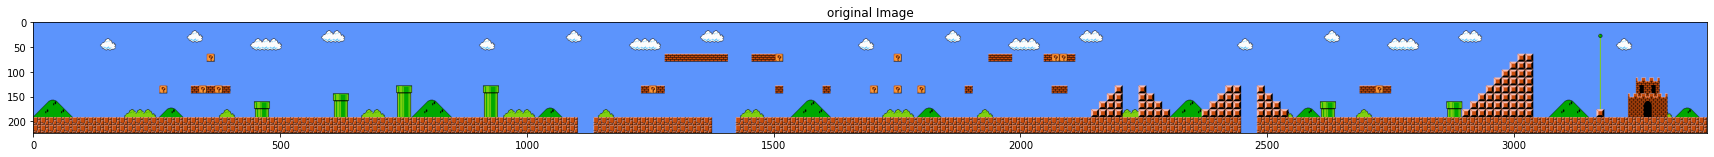

In [ ]:
plt.figure(figsize = (30,40))
plt.title("original Image")
plt.imshow(image)

In [ ]:
image.shape

(224, 3392, 3)

## Image resizing

In [ ]:
# resize the original image to 300 by 300
image_resized = skimage.transform.resize(image,(224,500))
image_resized.shape

(224, 500, 3)

In [ ]:
images_dir = '/gdrive/MyDrive/Colab Notebooks/Augmented_dataset_mario'
plt.savefig(f"{images_dir}/image_resized.png")


<Figure size 432x288 with 0 Axes>

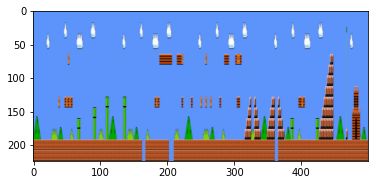

In [ ]:
plt.imshow(image_resized)

## Cropping the image

In [ ]:
def crop(image, crop_x, crop_y):
    
    y, x, c = image.shape
    
    # pixel positions to Start the crop
    startx = x//6 - (crop_x // 8)
    starty = y//4 - (crop_y // 4) 
    
    
    # pixel positions where to stop  the crop
    stopx = startx + crop_x
    stopy = starty + 2*crop_y
    
    return image[starty:stopy, startx:stopx]

In [ ]:
image_croped = crop(image,128,200)

In [ ]:
plt.savefig(f"{images_dir}/image_croped.png")

<Figure size 432x288 with 0 Axes>

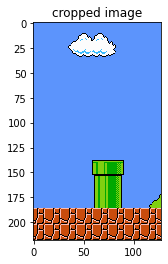

In [ ]:
plt.title("cropped image")
plt.imshow(image_croped)

In [ ]:
## Flipping the image

In [ ]:
plt.figure(figsize = (30,40))
image_flip = np.fliplr(image)# flipping left top right
image_flip2 = np.flipud(image)# flipping upside down


<Figure size 2160x2880 with 0 Axes>

In [ ]:
plt.savefig(f"{images_dir}/image_flip.png")
plt.savefig(f"{images_dir}/image_flip2.png")

<Figure size 432x288 with 0 Axes>

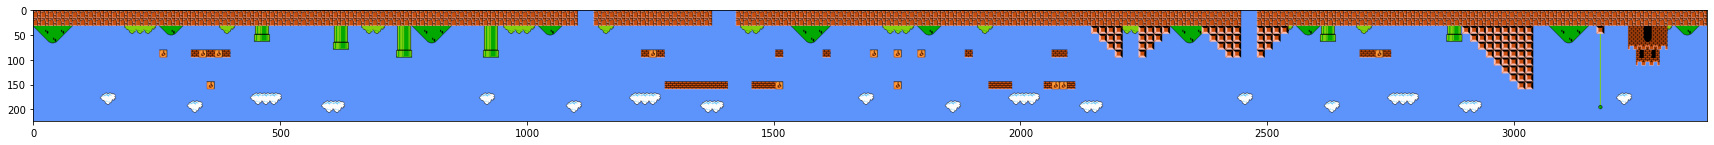

In [ ]:
plt.figure(figsize = (30,40))
plt.imshow(image_flip2)


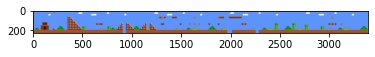

In [ ]:
plt.imshow(image_flip)

## Reshaping the image

In [ ]:
# preserving the height of the image and reshaping the width  and channel values 
reshaped_image = image.reshape(image.shape[0],-1)
reshaped_image.shape

(224, 10176)

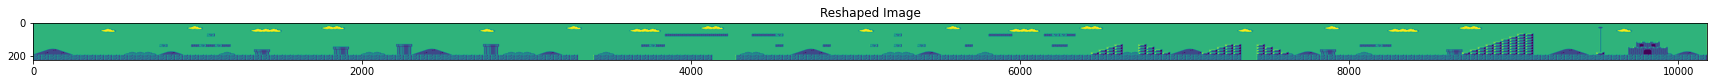

In [ ]:
plt.figure(figsize = (30,20))
plt.title("Reshaped Image")
plt.imshow(reshaped_image)

## Rotating the image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


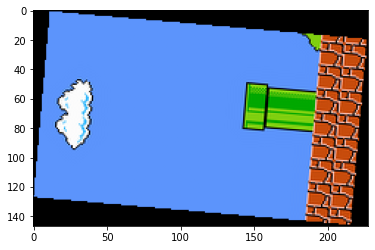

In [ ]:
from scipy import ndimage
rotated = ndimage.rotate(image_croped, 85)
plt.imshow(rotated)

## Changing the brightness and contrast

In [ ]:
def bright_contrast_loop (image, alpha=1, beta=0):
    new_image = np.zeros(image.shape, image.dtype)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            for c in range(image.shape[2]):
                new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)
    return new_image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


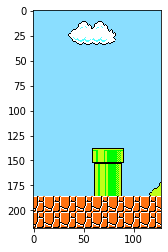

In [ ]:
contrast_im = bright_contrast_loop(image_croped,alpha=1.5)
plt.imshow(contrast_im)

## Smoothening the image with filter 

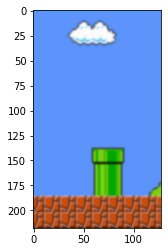

In [ ]:
filtered_img = gaussian(image_croped,sigma=1,mode='reflect')
plt.imshow(filtered_img)

## Adding noise to the image

Text(0.5, 1.0, 'Random Noise')

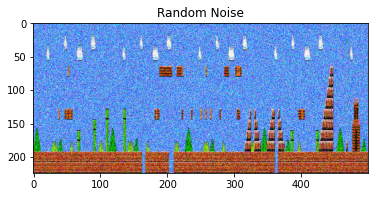

In [ ]:
#standard deviation for noise to be added in the image
sigma=0.155
#add random noise to the image
noisyRandom = random_noise(image_resized,var=sigma**2)

plt.imshow(noisyRandom)
plt.title('Random Noise')